In [107]:
# Import the files

from docx import Document

def read_docx(file_path):
    document = Document(file_path)
    full_text = []
    for paragraph in document.paragraphs:
        full_text.append(paragraph.text)
    return "\n".join(full_text)

cnn_text = read_docx("/Users/houderou/Library/Mobile Documents/com~apple~CloudDocs/AMU documents /MS in DS 1/CSC-604-001_Adv Introduction to Coding/HW/lichtman-AU-Article.docx")  
ai_text = read_docx("/Users/houderou/Library/Mobile Documents/com~apple~CloudDocs/AMU documents /MS in DS 1/CSC-604-001_Adv Introduction to Coding/HW/lichtman-chatgpt.docx")

In [108]:
# Perform word tokenization, remove stop words and punctuation, and perform lemmatization computing

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

def preprocess(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    tokens = [word for word in tokens if re.match(r'^[a-zA-Z0-9]+$', word)]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]
    return tokens

cnn_tokens = preprocess(cnn_text)
ai_tokens = preprocess(ai_text)

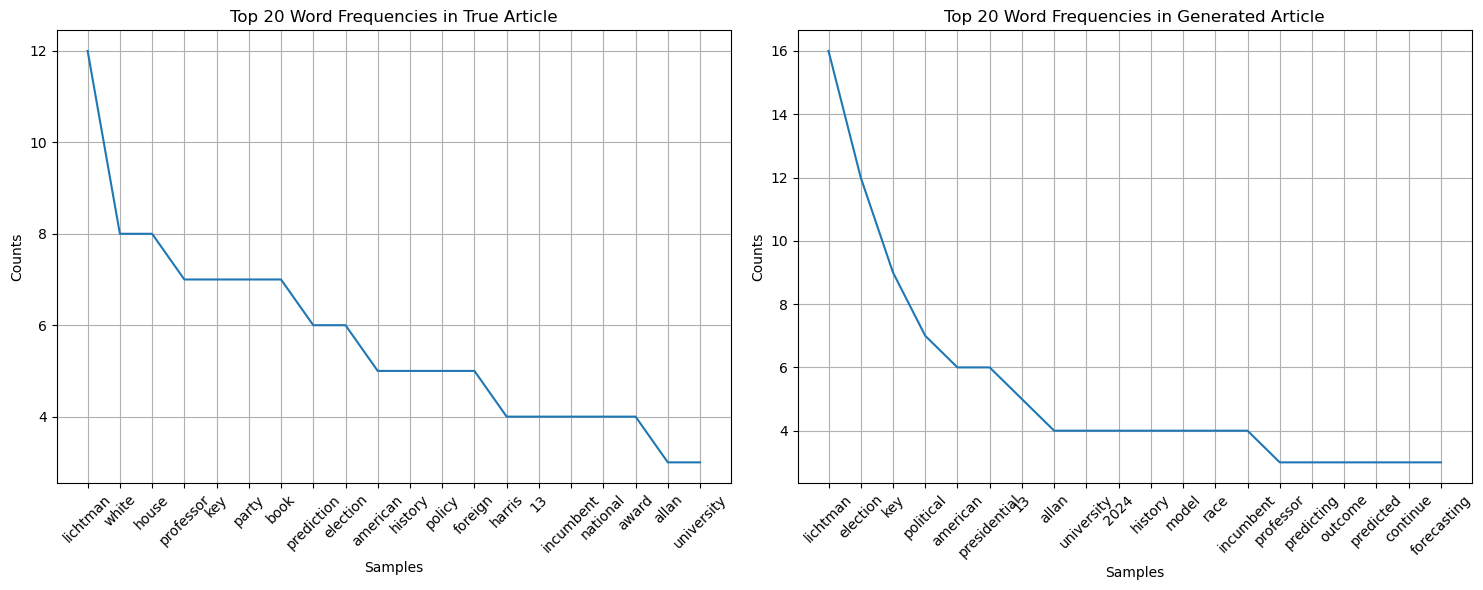

In [109]:
# Plot word frequency distributions

import matplotlib.pyplot as plt

def plot_word_freq(tokens, title, ax):
    freq_dist = nltk.FreqDist(tokens)
    most_common = freq_dist.most_common(20)
    words, counts = zip(*most_common)
    ax.plot(words, counts)  
    ax.set_title(f"Top 20 Word Frequencies in {title}")
    ax.set_xlabel("Samples")
    ax.set_ylabel("Counts")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plot_word_freq(cnn_tokens, "True Article", ax=axes[0])
plot_word_freq(ai_tokens, "Generated Article", ax=axes[1])

plt.tight_layout()
plt.show()

In [110]:
from collections import Counter

def pos_analysis(tokens):
    pos_tags = nltk.pos_tag(tokens)
    pos_counts = Counter(tag for word, tag in pos_tags)
    return pos_counts

cnn_pos_counts = pos_analysis(cnn_tokens)
ai_pos_counts = pos_analysis(ai_tokens)
print("True:\n",cnn_pos_counts)
print("Generated:\n",ai_pos_counts)


True:
 Counter({'NN': 150, 'JJ': 98, 'CD': 25, 'VBD': 18, 'VBP': 11, 'RB': 9, 'VBG': 7, 'VBN': 5, 'VB': 5, 'IN': 3, 'NNS': 2, 'VBZ': 2, 'JJS': 2, 'JJR': 1, 'MD': 1, 'DT': 1})
Generated:
 Counter({'NN': 169, 'JJ': 88, 'CD': 19, 'VBD': 16, 'VBG': 16, 'RB': 13, 'VBZ': 8, 'IN': 6, 'VBN': 6, 'VBP': 6, 'RBR': 2, 'NNS': 2, 'JJS': 2, 'DT': 1, 'RBS': 1, 'JJR': 1})


In [111]:
def named_entity_analysis(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    named_entities = nltk.ne_chunk(pos_tags, binary=True)
    entity_count = sum(1 for subtree in named_entities if isinstance(subtree, nltk.Tree))
    return entity_count

cnn_entity_count = named_entity_analysis(cnn_text)
ai_entity_count = named_entity_analysis(ai_text)
print("True Article Named Entities:", cnn_entity_count)
print("Generated Article Named Entities:", ai_entity_count)

True Article Named Entities: 44
Generated Article Named Entities: 31
